# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. 

* id — уникальный идентификатор скважины;

* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [3]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
df_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


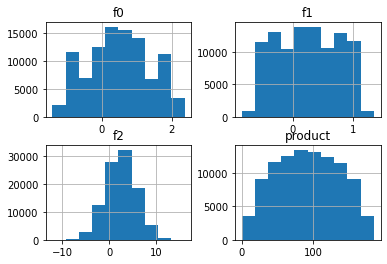

In [11]:
df_0.hist();

Признак f2 распределен чуть-чуть иначе, чем f0 и f1, но не критично

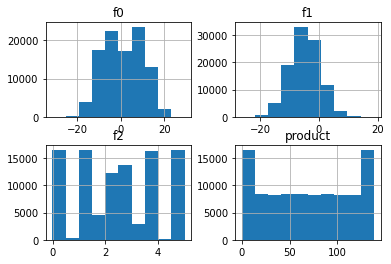

In [12]:
df_1.hist();

Здесь уже f2 и product распредлены по-другому, в отличие от остльных

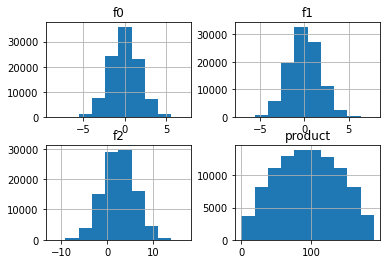

In [13]:
df_2.hist();

Пропусков в стобцах нет - ничего заполнять не нужно.

В нашем случае столбец ID не несет нам какой-либо важной информации, поэтому удалим его во всех 3 датасетах.

In [14]:
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)

Рассмотрим наличие или отсутвуие мультиколлинеарности между признаками

In [15]:
df_0.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


Как таковой сильной мультиколлинеарности в первом регионе не вижу.

In [16]:
df_1.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,0.182248,-0.002000,-0.122869
f1,0.182248,1.000000,-0.003678,-0.033908
f2,-0.002000,-0.003678,1.000000,0.975605
product,-0.122869,-0.033908,0.975605,1.000000


А вот во втором коэффициент мультиколлинеарности между f2 и product сильный... Возможно, из-за этого их распредление на гистограммах отличается от остальных.

In [17]:
df_2.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,0.002493,0.000053,-0.002464
f1,0.002493,1.000000,0.000378,-0.001463
f2,0.000053,0.000378,1.000000,0.448463
product,-0.002464,-0.001463,0.448463,1.000000


Здесь все более-менее в порядке

<b>Вывод: </b>данные сильной доработки не требовали - пропусков не было, проблем с типом данных тоже. В df_0 и df_1 признак f2 отличается от дугих на гистограмме. Также был удален столбец с id, т.к. он не несет важной нам информации.

Была рассмотрена мультиколлинеарность признаков. F2 и product во всех трех случаях имеют более сильную связь, чем оставшиеся признаки. Но во втором регионе этот коэффицент особенно высокий (0,97).

## Обучение и проверка модели

Разобьем данные на обучающую и валидационную выборки в соотношении 75:25

In [18]:
target_0 = df_0['product']
features_0 = df_0.drop(['product'],axis=1)

target_1 = df_1['product']
features_1 = df_1.drop(['product'],axis=1)

target_2 = df_2['product']
features_2 = df_2.drop(['product'],axis=1)

In [19]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0,
                                                                                          test_size=0.25,
                                                                                          random_state=12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1,
                                                                                          test_size=0.25,
                                                                                          random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2,
                                                                                          test_size=0.25,
                                                                                          random_state=12345)

In [20]:
print(features_train_0.shape)
print(features_valid_0.shape)
print(target_train_0.shape)
print(target_valid_0.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [21]:
print(features_train_1.shape)
print(features_valid_1.shape)
print(target_train_1.shape)
print(target_valid_1.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [22]:
print(features_train_2.shape)
print(features_valid_2.shape)
print(target_train_2.shape)
print(target_valid_2.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


Чтобы избежать разного масштаба признаков - стандартизируем их с помощью scaler.

In [23]:
pd.options.mode.chained_assignment = None #чтоб предупреждение не выскакивало

In [24]:
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = scaler.transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0)

scaler.fit(features_train_1)
features_train_1 = scaler.transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1)

scaler.fit(features_train_2)
features_train_2 = scaler.transform(features_train_2)
features_valid_2 = scaler.transform(features_valid_2)

Будем использовать линейную регрессию

In [25]:
def lin_regr(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    
    rmse = mean_squared_error(prediction_valid, target_valid) ** 0.5
    mean = prediction_valid.mean()
    return prediction_valid, rmse, mean

In [26]:
pred_0, rmse_0, mean_0 = lin_regr(features_train_0, features_valid_0, target_train_0, target_valid_0)
print('Для региона 1 средний запас предсказанного сырья =', round(mean_0, 4), ', RMSE =', round(rmse_0, 4))
print()

pred_1, rmse_1, mean_1 = lin_regr(features_train_1, features_valid_1, target_train_1, target_valid_1)
print('Для региона 2 средний запас предсказанного сырья =', round(mean_1, 4), ', RMSE =', round(rmse_1, 4))
print()

pred_2, rmse_2, mean_2 = lin_regr(features_train_2, features_valid_2, target_train_2, target_valid_2)
print('Для региона 3 средний запас предсказанного сырья =', round(mean_2, 4), ', RMSE =', round(rmse_2, 4))

Для региона 1 средний запас предсказанного сырья = 92.5926 , RMSE = 37.5794

Для региона 2 средний запас предсказанного сырья = 68.7285 , RMSE = 0.8931

Для региона 3 средний запас предсказанного сырья = 94.965 , RMSE = 40.0297


<b>Вывод: </b>наибольший средний запас предсказанного сырья у региона 3 - 94,96. Его RMSE = 40,02 - самое большое значение данной метрики из всех регионов. В идеале она должна быть минимальной, поэтому в данном случае выделяется второй регион.

## Подготовка к расчёту прибыли

### Подготовка к расчету

In [27]:
points = 500
best_points = 200
budget = 10000000000
pries_barrel = 450000
lesion = 2.5

In [28]:
material_min = round(budget / best_points / pries_barrel, 2)
print('Минимальное кол-во сырья региона для разработки =', material_min, 'тыс.баррелей')

Минимальное кол-во сырья региона для разработки = 111.11 тыс.баррелей


### Расчет прибыли

Напишем функцию для расчета прибыли по 200 лучшим точкам

In [29]:
def profit_best_points(target_valid, predictions_valid, best_points):
    
    target = target_valid.reset_index(drop = True)
    predictions = pd.Series(predictions_valid, index = target.index)
    best_result = target[predictions.sort_values(ascending = False).index][:best_points]
    
    return (best_result.sum() * pries_barrel - budget) / 1000000000

In [30]:
revenue_0 = profit_best_points(target_valid_0, pred_0, best_points)
revenue_1 = profit_best_points(target_valid_1, pred_1, best_points)
revenue_2 = profit_best_points(target_valid_2, pred_2, best_points)

In [31]:
print('Регион 1: прибыль для полученного объема сырья =', round(revenue_0, 4), 'млрд.руб.')
print()
print('Регион 2: прибыль для полученного объема сырья =', round(revenue_1, 4), 'млрд.руб.')
print()
print('Регион 3: прибыль для полученного объема сырья =', round(revenue_2, 4), 'млрд.руб.')

Регион 1: прибыль для полученного объема сырья = 3.3208 млрд.руб.

Регион 2: прибыль для полученного объема сырья = 2.4151 млрд.руб.

Регион 3: прибыль для полученного объема сырья = 2.7103 млрд.руб.


## Расчёт прибыли и рисков 

Применим технику Bootstrap для поиска распредления прибыли. напишем функцию, чтобы сократить код

In [32]:
def bootstrap(target, prediction, best_points):
    state = np.random.RandomState(12345)
    values_bootstrap = []
    
    for i in range(1000):        
        target_subsample = target.reset_index(drop=True).sample(n=points, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        values_bootstrap.append(profit_best_points(target_subsample, probs_subsample, best_points))
        
    values_bootstrap = pd.Series(values_bootstrap)
    mean = values_bootstrap.mean()
    
    #95%-й доверительный интервал
    lower = values_bootstrap.quantile(0.025) 
    upper = values_bootstrap.quantile(0.975)
    
    risk =(len(values_bootstrap[values_bootstrap < 0]) / len(values_bootstrap)) * 100  
    
    return mean, lower, upper, risk

In [33]:
mean_0, lower_0, upper_0, risk_0 = bootstrap(target_valid_0, pred_0, best_points)
mean_1, lower_1, upper_1, risk_1 = bootstrap(target_valid_1, pred_1, best_points)
mean_2, lower_2, upper_2, risk_2 = bootstrap(target_valid_2, pred_2, best_points)

In [34]:
print('Регион 1: среднее значение прибыли =', round(mean_0, 4))
print('Регион 1: доверительный интервал находится в промежутке от', round(lower_0, 4), 'до' ,round(upper_0, 4))
print('регион 1: уровень риска =', risk_0)

Регион 1: среднее значение прибыли = 0.3962
Регион 1: доверительный интервал находится в промежутке от -0.1112 до 0.9098
регион 1: уровень риска = 6.9


In [35]:
print('Регион 2: среднее значение прибыли =', round(mean_1, 4))
print('Регион 2: доверительный интервал находится в промежутке от', round(lower_1, 4), 'до' ,round(upper_1, 4))
print('регион 2: уровень риска =', risk_1)

Регион 2: среднее значение прибыли = 0.456
Регион 2: доверительный интервал находится в промежутке от 0.0338 до 0.8523
регион 2: уровень риска = 1.5


In [36]:
print('Регион 3: среднее значение прибыли =', round(mean_2, 4))
print('Регион 3: доверительный интервал находится в промежутке от', round(lower_2, 4), 'до' ,round(upper_2, 4))
print('регион 3: уровень риска =', risk_2)

Регион 3: среднее значение прибыли = 0.4044
Регион 3: доверительный интервал находится в промежутке от -0.1634 до 0.9504
регион 3: уровень риска = 7.6


<b>Вывод: </b>наибольшее среднее значение имеет регион 2. Также этот же регион имеет наименьший уровень риска. Думаю, можно сделать вывод, что наиболее подходящий регион для добывания нефти - регион 2.

## Вывод

Изначальные данные не требовали сильной дороботки. В процессе изучения данных (а именно по построению гистограмм) было замечено, что во втором регионе f2 и product распредлены иным образом, чем f1 и f3. Позже, когда была посчитана мультиколлинеарность, выяснилось, что между этими двумя признаками (все в том же втором регионе) весьма сильная мультиколлинеарность = _0,97_.

Далее данные были разбиты на обучающую и валидационную выборки в соотношении 75 к 25. С помощью scaler была произведена стандартизация, чтобы избежать дисбаланса классов.

В качестве модели использовалась линейная регрессия, т.к. она наиболее предсказуема. Были предсказны следующие значения: 

    Для региона 1 средний запас предсказанного сырья = 92.59 , RMSE = 37.57

    Для региона 2 средний запас предсказанного сырья = 68.72 , RMSE = 0.89

    Для региона 3 средний запас предсказанного сырья = 94.96 , RMSE = 40.02
RMSE - метрика, которая показывает среднюю ошибку при прогнозировании. Чем она меньше - тем лучше. Таким образом, мы видим, что максимальное среднее у третьего региона, но при этом же у него самое большое RMSE. А вот у второго региона RMSE = _0.89_. на это стоить обратить внимание.

Далее были рассчитаны среднее значение прибыли, доверительный интвервал (то, в каком промежутке может варьироваться наше значение) и риски. Наилучший показатель показал второй регион:

    Регион 2: среднее значение прибыли = 0.456
    Регион 2: доверительный интервал находится в промежутке от 0.0338 до 0.8523
    регион 2: уровень риска = 1.5
У него наибольшее среднее значение прибыли и наименьший показатель риска.

В связи со всеми вышеописанными выводами, можно сказать, что наилучшим регионом для разработки скважин является <b>регион 2</b>